# Hi!

I'm **Rizky Anshari**

Notebook ini adalah bentuk evaluasi saya pada pembelajaran machine learning untuk supervised learning.

### The Data
'Uber dan lyft dataset'

### The Objective
Pada dataset uber dan lyft ini, kita akan melakukan ekplorasi data dan modelling
dengan menguji setiap variabel yang berpengaruh terhadap harga dari uber dan lyft.

![Image](https://www.apurple.co/wp-content/uploads/2022/04/uber-vs-lyft-which-is-better.jpg)

## Library Use

In [5]:
# Import lybrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

## Data Loading

dataset = https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

memasukan fungsi pandas untuk load dataset

In [6]:
#load dataset dengan pandas
df = pd.read_csv('rideshare_kaggle.csv')

melihat ukuran dataset, ada 693071 baris dan 57 kolom

In [7]:
#shape ukuran dataframe
df.shape

(693071, 57)

melihat dataset

In [8]:
#menampilkan 5 baris teratas dataset
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [9]:
#menampikan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

melihat data null, type masing2 data, dan melihat feature

melihat dan identifkasi data yang bertipe object

In [10]:
#mengambil kolom categoty
df_category = df.select_dtypes("object")
df_category.head() #menampilakan 5 baris teratas

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


## Data Cleaning

menjumlahkan data isnull setiap kolom

In [11]:
# checking massing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

ditemukan ada 55095 data isnull pada kolom price

In [12]:
nulls = pd.DataFrame(df.isnull().sum(), columns=["nulls"]) #menjumlahkan data null
nulls["null percentage"] = nulls["nulls"]/df.shape[0]*100 #memasukan dalam percent
nulls[nulls["nulls"] > 0]

,nulls,null percentage
price,55095,7.949402


jika dipersenkan data isnull di kolom price 7.9 percent

data ini kemudian di drop, dengan pertimbangan karena price adalah target

karena jika di fill dikhatirkan akan mengubah hasil data sebenarnya.

In [13]:
df = df.dropna(axis=0) # drop kolom null

setelah didrop, index direset kembali agar sesuai urutan nomornya

In [14]:
df.reset_index(drop=True) #reset index

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637972,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637973,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637974,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


pengecekan missing value kembali, kali ini data telah bersih/0

In [15]:
df.isnull().sum().sum() #sum dan checking null kembali

0

shape data setelah handling missing value

In [16]:
df.shape #shape setelah dara drop

(637976, 57)

checking data duplicated

In [17]:
df.duplicated().sum() #checking duplicate data

0

membuah copy data untuk diolah, agar tidak mempengaruhi data sebenarnya

In [18]:
data = df.copy() #copy dataset

## Exploratory Data Analysis (EDA)
Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [19]:
data.describe().T #describe dataset

,count,mean,std,min,25%,50%,75%,max
timestamp,637976.0,1.544046e+09,689202.790112,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


menampilkan describe data, dan melihat apakah ada anomali.

terlihat tidak ada anomali pada kolom-kolom didataset

In [20]:
data.corr().style.background_gradient() #korelasi setiap kolom numerik dengan price

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,-0.226472,-0.179834,-0.147351,-0.167740,-0.066364,0.005565,0.998843,0.158577,-0.228324,0.999332,-0.366885,0.999175,-0.215550,0.999312,-0.402043,0.999204,-0.265512,0.533074,-0.133853,-0.081522,-0.025986,0.158577,0.196566,0.999372,0.999372,-0.846279,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0

menampilkan korelasi pada setiap kolom (feature), untuk dibandingkan dengan price (targetnya).

terlihat dari semua feature, feature yang berhubungan dengan price hanya ada 2 kolom, yaitu distance dan surge_multiplier

In [21]:
cat_corr = pd.get_dummies(data[['price', 'source', 'destination', 'cab_type', 'name', 'short_summary']]).corr()
cat_corr.style.background_gradient() #korelasi setiap kolom category dengan price

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
price,1.000000,-0.016101,-0.028396,0.074634,0.059317,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.010834,-0.009565,0.077515,0.051780,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,0.083385,-0.083385,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,-0.256930,-0.223551,-0.028587,-0.223557,-0.002387,-0.000480,-0.000052,0.000508,0.002734,-0.000729,0.000350,-0.001137,-0.000104
source_Back Bay,-0.016101,1.000000,-0.090641,-0.090950,-0.090944,-0.091903,-0.090926,-0.090949,-0.090393,-0.090942,-0.090939,-0.090977,-0.090771,-0.090967,-0.090640,0.087136,0.087887,-0.091898,0.090336,0.102169,-0.090394,0.090084,0.088027,-0.090966,-0.090782,0.000229,-0.000229,-0.000068,-0.000070,0.000073,0.000073,0.000073,0.000073,0.000073,0.000056,-0.000062,-0.000067,-0.000070,-0.000070,-0.000300,0.001399,0.001078,0.001025,-0.001342,0.002156,-0.002511,-0.000151,0.000552
source_Beacon Hill,-0.028396,-0.090641,1.000000,-0.090614,-0.090608,-0.091563,-0.090590,-0.090613,-0.090059,-0.090606,-0.090603,-0.090641,-0.090435,-0.090630,-0.090305,0.084072,0.088158,-0.091559,0.090492,0.099522,-0.090059,0.092852,0.088525,-0.090629,-0.090446,0.000030,-0.000030,-0.000006,-0.000008,0.000009,0.000009,0.000009,0.000009,0.000009,0.000012,-0.000020,-0.000004,-0.000008,-0.000008,-0.001102,-0.001225,0.005182,0.001649,0.001009,-0.001928,0.000406,-0.001568,0.000218
source_Boston University,0.074634,-0.090950,-0.090614,1.000000,-0.090917,-0.091876,-0.090899,-0.090922,-0.090366,-0.090915,-0.090912,-0.090950,-0.090744,0.087160,0.083949,-0.090922,-0.090917,0.089974,-0.090922,-0.090915,0.089665,-0.090916,-0.090911,0.097256,0.097511,-0.000010,0.000010,0.000002,0.000001,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000000,0.000009,0.000004,0.000001,0.000001,-0.000050,-0.000027,-0.003610,-0.001658,0.002398,-0.001953,0.001388,-0.004223,0.005236
source_Fenway,0.059317,-0.090944,-0.090608,-0.090917,1.000000,-0.091870,-0.090894,-0.090916,-0.090360,-0.090910,-0.090906,-0.090944,-0.090738,0.088037,0.088161,-0.090916,-0.090912,0.089501,-0.090916,-0.090910,0.094629,-0.090911,-0.090905,0.083608,0.101595,0.000023,-0.000023,-0.000007,-0.000009,0.000006,0.000006,0.000006,0.000006,0.000006,0.000010,-0.000001,-0.000006,-0.000009,-0.000009,0.000459,0.000698,-0.000602,-0.004589,-0.000976,0.000486,0.003323,-0.000819,0.000558
source_Financial District,0.053468,-0.091903,-0.091563,-0.091876,-0.091870,1.000000,-0.091852,-0.091875,-0.091313,-0.091868,-0.091864,-0.091903,-0.091694,-0.091892,-0.091562,0.089964,0.089733,-0.092834,0.097877,0.083025,-0.091314,0.088515,0.102078,-0.091892,-0.091706,0.001375,-0.001375,-0.000408,-0.000410,0.000424,0.000424,0.000424,0.000424,0.000424,0.000407,-0.000402,-0.000407,-0.000410,-0.000410,-0.000405,-0.001943,0.000227,0.005497,0.001492,-0.001012,-0.001837,-0.001324,-0.002146
source_Haymarket Square,-0.095924,-0.090926,-0.090590,-0.090899,-0.090894,-0.091852,1.000000,-0.090899,-0.090343,-0.090892,-0.090888,-0.090926,-0.09072

pada korelasi hubungan price dengan data ketegori, price memiliki korelasi yang kecil dengan feature name

## Data Preprocessing

memisahkan data inference sejumlah 2 data

In [22]:
inference = data.sample(2, random_state=41) #mengambil 2 sampel untuk inference data

data = data.drop(inference.index)

inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
671594,ef16c764-b9fb-4d1c-a6c3-1233d46992fe,1.544828e+09,22,14,12,2018-12-14 22:50:09,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
72227,08a07448-5378-44b5-9613-f485d69a42f0,1.543435e+09,19,28,11,2018-11-28 19:56:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800


Membagi data train dan test

In [23]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=41) #split data train dan test

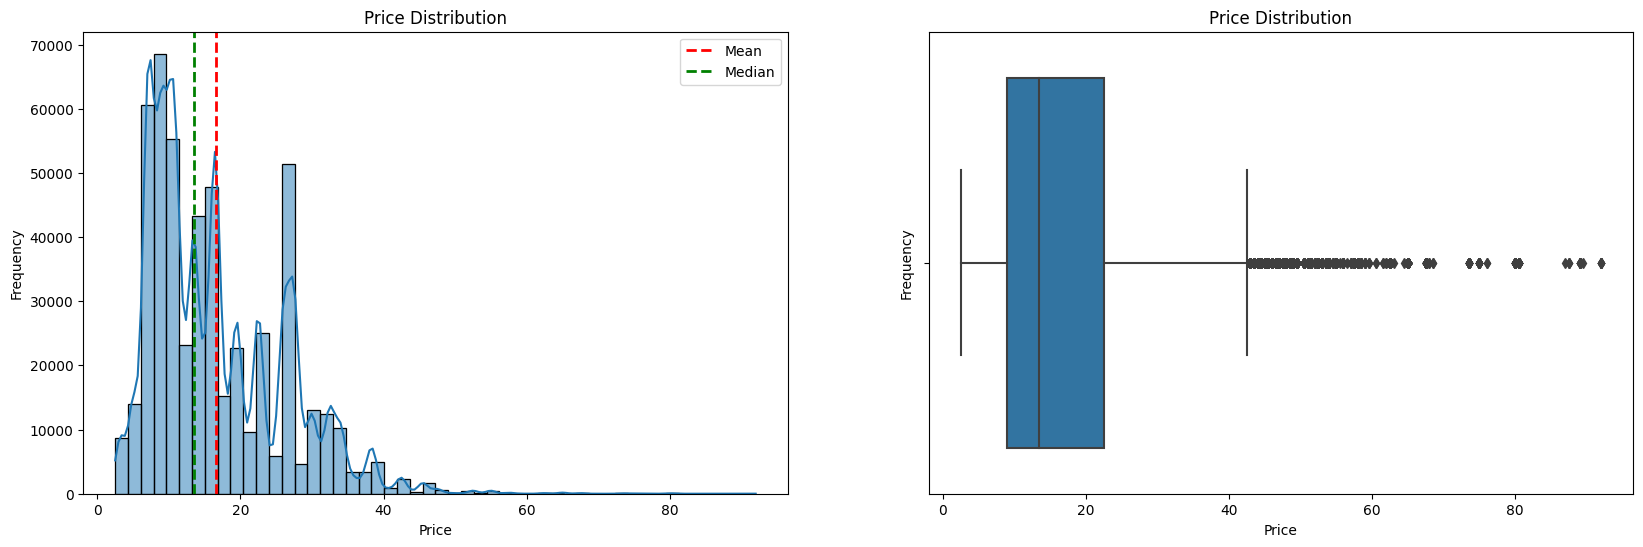

In [24]:
plt.figure(figsize=(20, 6)) #size figure
plt.subplot(1, 2, 1) #subplot
sb.histplot(x='price', data=df_train, bins=50, kde=True) #histogram plot
plt.axvline(df_train.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean') #garis mean
plt.axvline(df_train.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median') #garis median
plt.title('Price Distribution') #tittle
plt.xlabel('Price') #xlabel
plt.ylabel('Frequency') #ylabel
plt.legend() #element area
plt.subplot(1, 2, 2)
sb.boxplot(x='price', data=df_train) #box plot
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show() #menampilkan plot

In [25]:
print('Skewness square_ft:',data['price'].skew()) #skew
print('Kurtosis square_ft:',data['price'].kurtosis()) #kurtosis

Skewness square_ft: 1.0457456293015757
Kurtosis square_ft: 1.2248163295489185


data price memili outlier, dengan nilai skew 1.04 dan kurtosisnya 1.22

In [26]:
IQR = df_train.price.quantile(0.75) - df_train.price.quantile(0.25) #IQR
lower_bound = df_train.price.quantile(0.25) - (IQR * 1.5) #25%
upper_bound = df_train.price.quantile(0.75) + (IQR * 1.5) #75%

Handling  outlier dengan IQR

In [27]:
print(f'Jumlah outliers: {len(df_train[(df_train.price < lower_bound) | (df_train.price > upper_bound)])}') #len jumlah outlier

Jumlah outliers: 4452


In [28]:
df_train = df_train[(df_train.price > lower_bound) & (df_train.price < upper_bound)] #seleksi data sesuai IQR yang bersih dari outlier

mengambil data yang bersih dari outlier

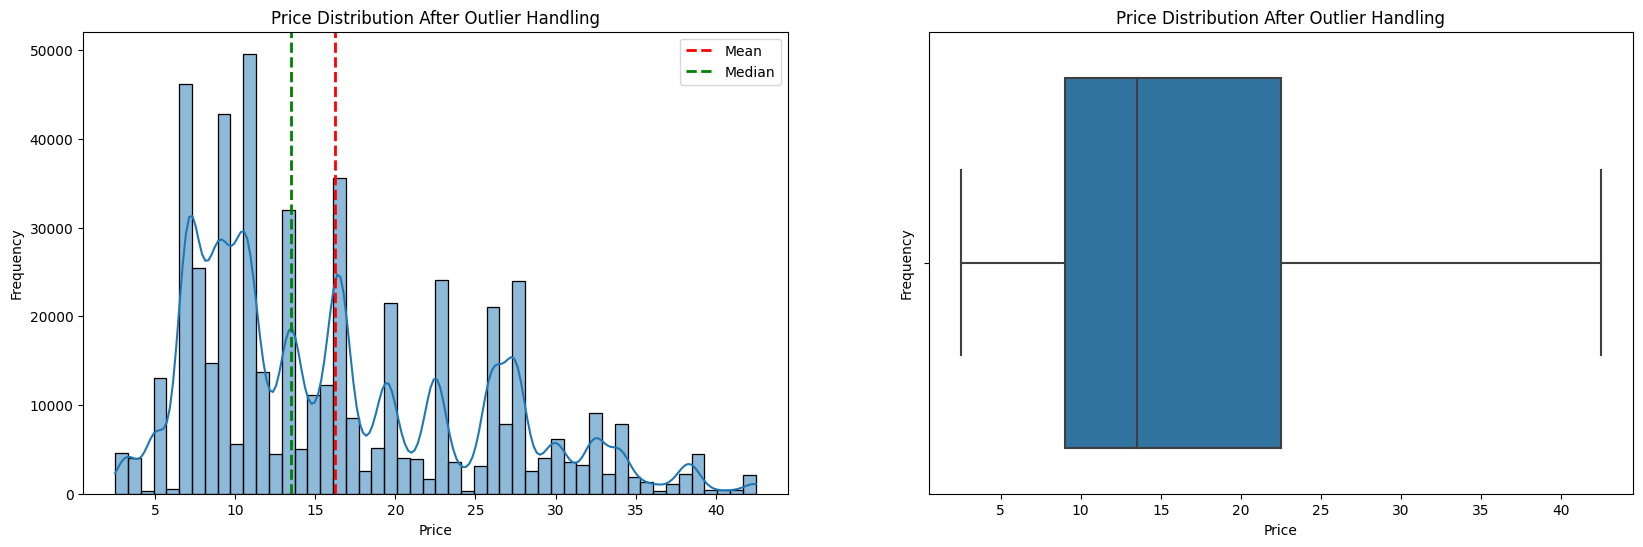

In [29]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sb.histplot(x='price', data=df_train, bins=50, kde=True)
plt.axvline(df_train.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Distribution After Outlier Handling')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sb.boxplot(x='price', data=df_train)
plt.title('Price Distribution After Outlier Handling')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Model Definition

seleksi feature yang digunakan, dengan landasan tabel korelasi pada data sebelumnya
feature yang digunakan adalah name, distance, dan surge_multiplier

In [30]:
X_train = df_train[['name', 'distance', 'surge_multiplier']] #seleksi feature
y_train = df_train.price #target

X_test = df_test[['name', 'distance', 'surge_multiplier']]
y_test = df_test.price

memisahkan kolom bertipe numerik dan kategori untuk memudahkan scaling dan encoding

In [31]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns #mengambil kolom dengan type float dan int
cat_cols = X_train.select_dtypes(include=['object']).columns #mengambil kolom type object

print(f'Jumlah kolom nomerik: {len(num_cols)}') # jumlah kolom
print(f'Nomerik kolom: {num_cols}') #nama kolom
print(f'Jumlah kolom kategori: {len(cat_cols)}')
print(f'Kategori kolom: {cat_cols}')

X_train_num = X_train[num_cols] #numerik dimasukan ke variabel X_train_num
X_train_cat = X_train[cat_cols] #kategori dimasukan ke X_train_cat

X_test_num = X_test[num_cols] #juga untuk X_test
X_test_cat = X_test[cat_cols]

Jumlah kolom nomerik: 2
Nomerik kolom: Index(['distance', 'surge_multiplier'], dtype='object')
Jumlah kolom kategori: 1
Kategori kolom: Index(['name'], dtype='object')


Feature Scaling


untuk menyamakan rentang angka pada kolom nomerik menggunakan standardscaler

tujuan scaling dengan harapan agar tidak terjadi penyimpangan pada hasil

In [32]:
scaler = StandardScaler() #scalling dengan standartscaller

X_train_num_scaled = scaler.fit_transform(X_train_num) #X_train di fit dan transform
X_test_num_scaled = scaler.transform(X_test_num) #X_test di transform

fit dan transform pada data

In [33]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols) # memasukan kembali pada format dataframe
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)

mengubah kembali dalam bentuk pandas dataframe

In [34]:
X_train_num_scaled.head(2) #data prame X_train setelah scalling

,distance,surge_multiplier
0,0.597897,-0.147639
1,-0.843238,-0.147639


In [35]:
X_test_num_scaled.head(2) #data prame X_test setelah scalling

,distance,surge_multiplier
0,-0.601557,-0.147639
1,-0.896944,-0.147639


X_train dan X_test setelah discaling dan kembali pada bentuk dataframe

Feature Encoding

data kategori dinormaslisasi agar dapat dibaca oleh model,

di encoding dengan onehotencoding

In [36]:
encoder = OneHotEncoder() #encoding data categori

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

memasukan kembali pada dataframe

In [37]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols)) #memasukan pada format dataframe
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


X_train kategori yang telah diencode

In [38]:
X_train_cat_encoded.head() #categori setelah di encode

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Training

feature yang telah discaling dan encoding kembali di gabungkan pada satu dataframe dengan fungsi concat

In [39]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1) #mengambungkan data scalling dan encoding
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

dataframe final

In [40]:
X_train.head() 

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.597897,-0.147639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.843238,-0.147639,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.027552,-0.147639,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.234560,-0.147639,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.129674,-0.147639,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training Model

menggunakan Linear Regression

model linear Regression dipilih dengan pertimbangan target yang bertype regression

In [41]:
lr = LinearRegression() 

lr.fit(X_train,y_train) #training model dengan linear regression

LinearRegression()

## Model Evaluation

In [42]:
y_train_pred = lr.predict(X_train) #predict model pada train
y_test_pred = lr.predict(X_test) #predict model pada test

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred)) #menampilkan nilai MAE
print("R2 Score:",r2_score(y_train,y_train_pred)) # menampilkan nila r2 score
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
Mean absolute error: 1.6778028744187559
R2 Score: 0.9332387567514568


==================== TEST ====================
Mean absolute error: 1.761833041085079
R2 Score: 0.9251341659175829


Dari hasil evaluasi pada model , didapatkan model **Linear Regression** memiliki akurasi dengan **R2 Score 0.93** dan **MAE 1.67** pada training setnya dan pada testing setnya mendapat **R2 Score 0.92** dan **MAE 1.76**

model tidak overfit atau underfit, model predict cukup bagus. tapi masih dapat dioptimalakan lagi dengan score yang jauh lebih baik

## Model Inference
Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli,

bukan data yang sudah di-scaled.

In [43]:
inference = inference.reset_index(drop=True) # data inference
inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,ef16c764-b9fb-4d1c-a6c3-1233d46992fe,1.544828e+09,22,14,12,2018-12-14 22:50:09,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
1,08a07448-5378-44b5-9613-f485d69a42f0,1.543435e+09,19,28,11,2018-11-28 19:56:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800


split data inference untuk numerik dan kategori

In [44]:
inference_num = inference[num_cols] #seleksi kolom numerik
inference_cat = inference[cat_cols] #seleksi kolom categori

scaliing data numerik

dan encoding data kategori

In [45]:
inference_num_scaled = scaler.transform(inference_num) #scaliing numerik

inference_cat_encoded = encoder.transform(inference_cat) #encoding categori

Menggabungkan data yang telah di transform dengan fungsi concat pada satu dataframe

In [46]:
inference_final = np.concatenate([inference_num_scaled, inference_cat_encoded.toarray()], axis=1) #menggabungkan data

predict data inference

In [47]:
y_pred_inf = lr.predict(inference_final) #pred model

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Price_Predic'])

hasil target predict dengan target yang sebenarnya.

In [49]:
predictions = pd.concat([inference['price'], y_pred_inf], axis=1) #membandingkan nilai aktual dan predict
predictions.columns = ['Price_Real', 'Price_Predic']
predictions

,Price_Real,Price_Predic
0,16.5,19.182361
1,17.0,17.085494


## Pengambilan Kesimpulan
Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Kesimpulan yang didapat dari ekplorasi data rideshare Uber dan Lyft, korelasi data, dan modellingnya.

didapatkan bahwa, banyak sekali faktor yang dirasa berpengaruh terhadap harga pada mode tranportasi ini tetapi pada kenyataanya tidak berpengaruh, contohnya pada keadaan dimana icon yang menjadi rerata cuaca pada hari tersebut misalnya rain, cloudy, dll ternyata tidak terdapat korelasi dengan price, kemudian juga untuk kolom lainnya seperti temperature, sore hari, malam hari, day/hari, bulan, dll tidak menunjukan adanya korelasi yang dapat mempengaruhi harga.

jadi berdasarkan eda feature2 yang mempengaruhi harga uber dan lyft adalah distance/jarak, surge_multiplier/lonjakan penumpang, dan name/jenis mode transportasi.

dengan 3 feature ini kemudian model memprediksi menggunakan model LinearRegression dan didapatkan hasil evaluasi pada model yaitu **R2 Score 0.93** dan **MAE 1.67** pada training setnya dan pada testing setnya mendapat **R2 Score 0.92** dan **MAE 1.76**

model ini masih kurang cukup sempurna, oleh karena itu masih cukup sangat dapat diimprovisasi seperti menggunakan model2 yang lain.